# Simulating bandpass sampling

In [1]:
%matplotlib widget 
import numpy as np
import matplotlib.pyplot as plt

## Making a signal
First we need to make the function we will sample. It will be a linear sum of 
sines from $f_0$ to $f_1$ with a step of $N$ Hz together with white noise $(\epsilon)$

$$
x(t) = \sum_{0}^{\frac{f_1-f_0}{N}+1} \frac{1}{n+1} \sin\left(2\pi (f_0+n*N)  t  \right) + \epsilon
$$

These will be inputs to our function.

In [2]:
# The analogue function we will be using is a 
def signal(t, f0 , f1 , N = 1e2, noise_scale = 1e-2) :
    '''
    This function generates our signal
    
    Parameters
    ----------
    t: float or numpy array of floats
        The time point(s) of interest in seconds

    f0 : float
        The starting frequency in Hz

    f1 : float
        The ending frequency in Hz

    N : int
        The spacing of the frequencies in Hz
        Default, 1e2

    noise_scale : float
        The standard deviation of the Gaussian noise 
        Default, 1e-2

    Returns
    -------
    x : floats or numpy array of floats
        Returns the signal with noise. Size is the same as the input t
    '''
    n = np.arange(0, 1 + (f1-f0)/N) # Make the n we are going to sum over
    display('Frequencies', f0+n*N) # Display the frequencies in the sum
    epsilon = np.random.normal(loc = 0.0, scale = noise_scale, size=len(t)) # Make the noise
    x = np.asarray([ np.sum( 1/(n+1) * np.sin(2 * np.pi * (f0+n*N) * tt))  for tt in t]) + epsilon # This is a complicated way of writing the sum of all the sines with frequencies n for all the times t 
    return x

## Plotting the continuous signal 
We are now going to plot part of the signal, bu first we have to set the lower and upper frequencies 

In [3]:
f0 = 96e3 # Hz
f1 = 104e3 # Hz 

Having set this frequencies, we can now plot the "continuous" signal for 50 microseconds using

'Frequencies'

array([ 96000.,  96100.,  96200.,  96300.,  96400.,  96500.,  96600.,
        96700.,  96800.,  96900.,  97000.,  97100.,  97200.,  97300.,
        97400.,  97500.,  97600.,  97700.,  97800.,  97900.,  98000.,
        98100.,  98200.,  98300.,  98400.,  98500.,  98600.,  98700.,
        98800.,  98900.,  99000.,  99100.,  99200.,  99300.,  99400.,
        99500.,  99600.,  99700.,  99800.,  99900., 100000., 100100.,
       100200., 100300., 100400., 100500., 100600., 100700., 100800.,
       100900., 101000., 101100., 101200., 101300., 101400., 101500.,
       101600., 101700., 101800., 101900., 102000., 102100., 102200.,
       102300., 102400., 102500., 102600., 102700., 102800., 102900.,
       103000., 103100., 103200., 103300., 103400., 103500., 103600.,
       103700., 103800., 103900., 104000.])

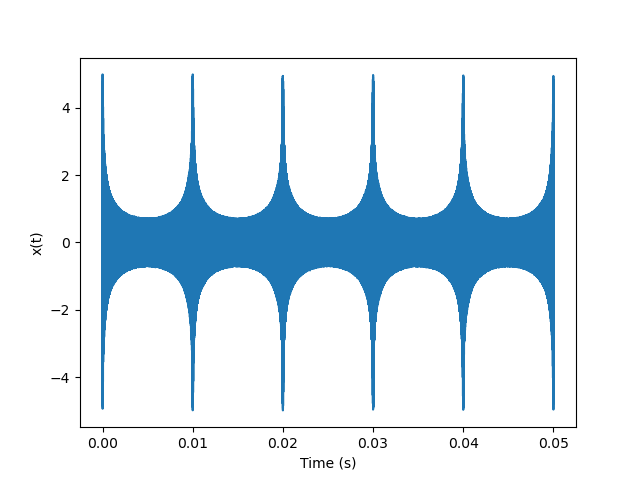

In [4]:

plt.figure()
t = np.arange(0, 5e-2, 5e-7) # Make the time vector with a very small spacing of 500 ns
plt.plot(t,signal(t, f0, f1)) # Plotting the function
plt.xlabel("Time (s)")
plt.ylabel("x(t)")
plt.show()

## Bandpass sampling 
If we now sample this signal with bandpass sampling, what is the lowest sampling frequency we can use?

In [5]:
fs = # This is where you need to input the sampling rate
m = # This is where you need to put in the m for the sampling rate

Once that is done, you can run the code under that samples the function and plots the results 

'Frequencies'

array([ 96000.,  96100.,  96200.,  96300.,  96400.,  96500.,  96600.,
        96700.,  96800.,  96900.,  97000.,  97100.,  97200.,  97300.,
        97400.,  97500.,  97600.,  97700.,  97800.,  97900.,  98000.,
        98100.,  98200.,  98300.,  98400.,  98500.,  98600.,  98700.,
        98800.,  98900.,  99000.,  99100.,  99200.,  99300.,  99400.,
        99500.,  99600.,  99700.,  99800.,  99900., 100000., 100100.,
       100200., 100300., 100400., 100500., 100600., 100700., 100800.,
       100900., 101000., 101100., 101200., 101300., 101400., 101500.,
       101600., 101700., 101800., 101900., 102000., 102100., 102200.,
       102300., 102400., 102500., 102600., 102700., 102800., 102900.,
       103000., 103100., 103200., 103300., 103400., 103500., 103600.,
       103700., 103800., 103900., 104000.])

ValueError: zero-size array to reduction operation minimum which has no identity

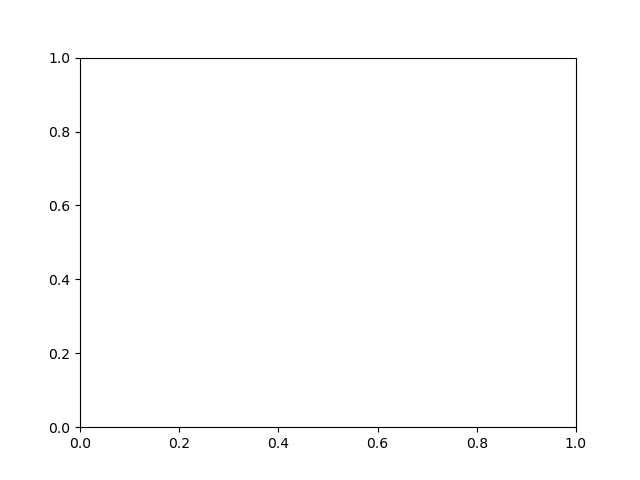

In [6]:


N = int(5 * 0.01 * fs)  # The number of samples, 5 times the periode 

n = np.arange(N) # Make the n for the samples 0 to N-1

xn = signal(n/fs, f0, f1) # Sample the function, notice the 1/fs

plt.figure()
plt.stem(n, xn, linefmt = '--b', basefmt = 'k')
plt.xlabel('Time (n)')
plt.ylabel('x(n)')
plt.show()

Or ploted with the x-axis in seconds

In [ ]:
plt.figure()
plt.stem(n/fs, xn, linefmt = '--b', basefmt = 'k')
plt.xlabel('Time (s)')
plt.ylabel('x(n)')
plt.show()

## Plotting the spectrum
Now we can take a look at what the spectrum looks at.

To show this we need to use a tool, FFT,  that we will talk more about later.
The code under first check if $m$ is odd, and if so, multiplies $x_n$ with the series $(1,-1,1,-1,1,-1,\ldots)$ which we can get from evaluation $\cos(\pi n)$.

In [ ]:
if m%2==1:
    # m is odd
    inv = np.cos(np.pi*n) # Make  alternating sequence 
    X = np.fft.fft(xn*inv,  norm = 'ortho') # Taking the FFT
else:
    # m is even
    X = np.fft.fft(xn,  norm = 'ortho') # Taking the FFT
f = np.fft.fftfreq(N, d = 1/fs) # Calculating the returned frequencies

plt.figure()
plt.plot(f, 20*np.log10(np.abs(X)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.show()

Was that as expected? 
You can also simulat the lowpass case by setting $f_s$ to the lowpass limit and $m=0$

## Showing the aliasing

Here we are going to use interpolation (something we will talk about later in the course) to se all of the aliasing.
First you have to input the lowpass sampling frequency lower limit. 

In [ ]:
fn = # What is the minimum sampling frequency for lowpass sampling?

L = int(fn/fs)  # Interpolation factor 
display('Interpolation factor', L )
x_int = np.zeros( len(xn) * L ) # make a zero vector with L times the length of x
x_int[::L] = xn # Fill inn every Lth sample with one from xn

X_int = np.fft.fft(x_int,  norm = 'ortho') # Taking the FFT
f_int = np.fft.fftfreq(N*L, d = 1/(L*fs)) # Calculating the returned frequencies

plt.figure()
plt.plot(f_int, 20*np.log10(np.abs(X_int)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.show()


We could now filter the interpolated samples to only get the bandwidth we had

In [ ]:
import scipy.signal as sig # Signal processing library
import scipy

h = sig.firwin(71, # Number of taps
                  cutoff = f0, # Cutoff frequency 
                  width = 8e3, # Width of filter
                  window = 'hann', # window to use
                  pass_zero = 'highpass', # type of filter
                  scale = True,
                  fs = fn) # Sampling frequency
x_filt = sig.convolve(x_int,h,mode='valid')

X_filt = np.fft.fft(x_filt,  norm = 'ortho') # Taking the FFT
f_filt = np.fft.fftfreq(len(X_filt), d = 1/fn) # Calculating the returned frequencies

# Clean the figure by shifting the arrays
X_filt = scipy.fft.fftshift(X_filt)
f_filt = scipy.fft.fftshift(f_filt)

plt.figure()
plt.plot(f_filt, 20*np.log10(np.abs(X_filt)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.show()
